In [2]:
import pandas as pd
import numpy as np
from src import soporte as sp

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/union_tablas.csv", index_col=0)
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# FASE 2
## Visualización

In [38]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
df_año_mes = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

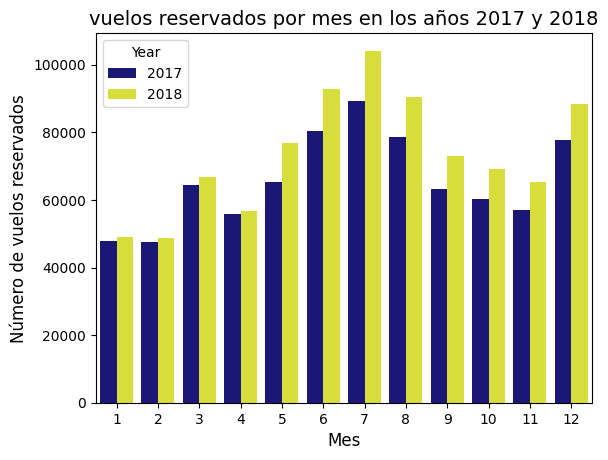

In [42]:
sns.barplot(x='Month', 
            y='Flights Booked', 
            hue='Year', 
            data=df_año_mes,
            palette="plasma")

# Personalización del gráfico
plt.title('vuelos reservados por mes en los años 2017 y 2018', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de vuelos reservados', fontsize=12);

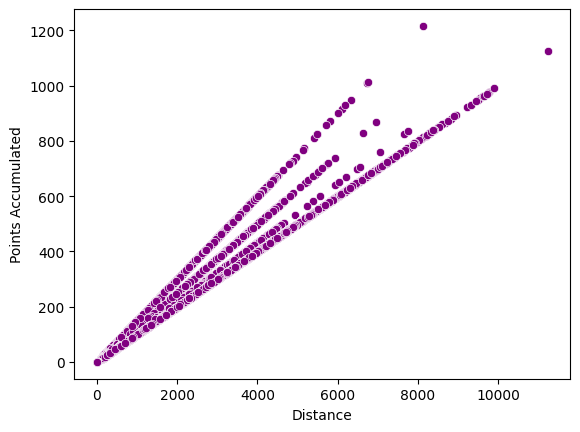

In [66]:
#¿Existe una relación entre ladistancia de los vuelos y los puntos acumulados por los clientes?

sns.scatterplot(x="Distance", y="Points Accumulated", data=df, color="purple");

In [26]:
correlacion_distance_points = df[["Points Accumulated", "Distance"]]
correlacion_distance_points

,Points Accumulated,Distance
0,152.0,1521
1,132.0,1320
2,253.0,2533
3,92.0,924
4,0.0,0
...,...,...
401683,367.0,3672
401684,0.0,0
401685,70.0,708
401686,204.0,2040


In [27]:
df_correlaciones = correlacion_distance_points.corr( method = "pearson")
df_correlaciones
# correlacion positiva fuerte, al ser casi 1. 

,Points Accumulated,Distance
Points Accumulated,1.00000,0.99453
Distance,0.99453,1.00000


In [31]:
#¿Cuál es la distribución de los clientes por provincia o estado?

df_provincias = df.groupby("Province")["Loyalty Number"].count().reset_index().sort_values("Loyalty Number", ascending=False).reset_index(drop=True)
df_provincias

,Province,Loyalty Number
0,Ontario,129696
1,British Columbia,105816
2,Quebec,79200
3,Alberta,23256
4,Manitoba,15792
5,New Brunswick,15264
6,Nova Scotia,12432
7,Saskatchewan,9816
8,Newfoundland,6192
9,Yukon,2640


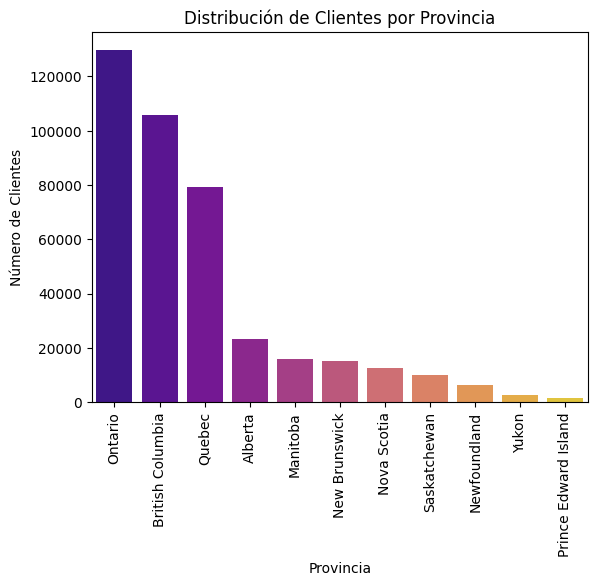

In [34]:
sns.barplot(x="Province", y= "Loyalty Number", data=df_provincias, palette='plasma')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90);

In [24]:
# ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
salario_promedio = df.groupby("Education")["Salary"].mean().reset_index().sort_values("Salary", ascending=False).reset_index(drop=True)
salario_promedio

,Education,Salary
0,Doctor,178608.897820
1,Master,103757.848425
2,Bachelor,72577.254415
3,High School or Below,61199.161125
4,College,NaN


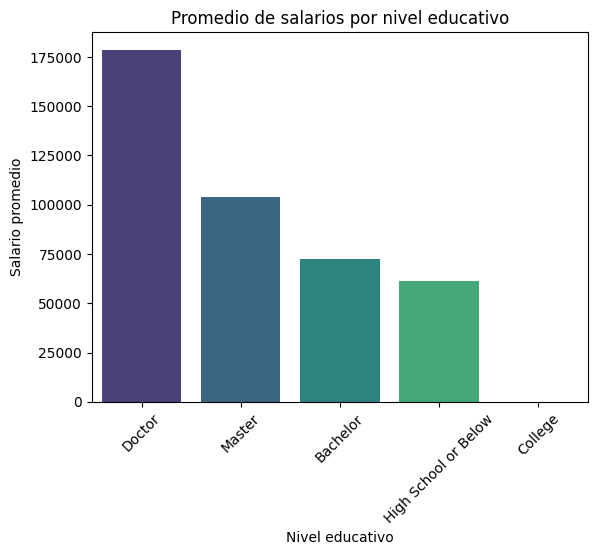

In [36]:
sns.barplot(x="Education", 
            y= "Salary", 
            data=salario_promedio, 
            palette="viridis")

plt.title('Promedio de salarios por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45);

In [8]:
#¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

fidelidad = df["Loyalty Card"].value_counts().reset_index()
fidelidad

,Loyalty Card,count
0,Star,183288
1,Nova,136104
2,Aurora,82296


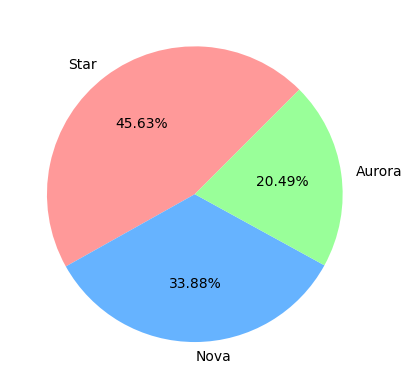

In [11]:
plt.pie("count", 
        labels="Loyalty Card", 
        data=fidelidad, 
        autopct=  '%1.2f%%', 
        startangle=45, 
        colors=['#ff9999','#66b3ff','#99ff99']);

In [12]:
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [51]:
#¿Cómo se distribuyen los clientes según su estado civil y género?
#La función size() después de groupby() cuenta el número de registros que pertenecen a cada combinación de estado civil y género.
# unstack Convierte un índice múltiple (obtenido tras un groupby()) en columnas, haciendo más fácil visualizar las relaciones entre categorías.
marital_gender = df.groupby(["Marital Status", "Gender"]).size().unstack()
marital_gender

Gender,Female,Male
Marital Status,,
Divorced,30456,29976
Married,116856,116784
Single,54528,53088


In [53]:
df_marital = df.groupby(["Marital Status", "Gender"])["Loyalty Number"].count().reset_index()

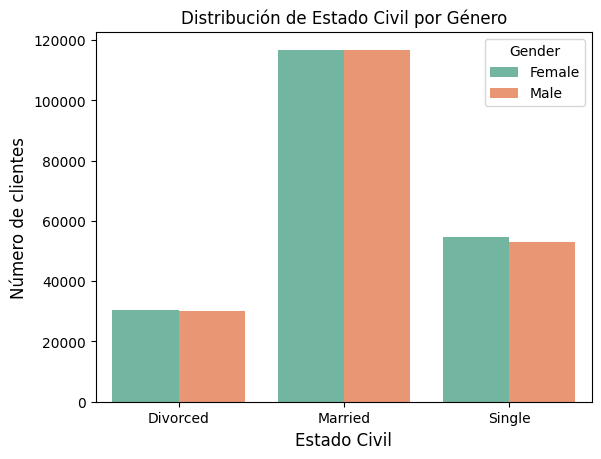

In [63]:
sns.barplot(x='Marital Status', y="Loyalty Number", hue='Gender', data=df_marital, palette="Set2")
# Personalización del gráfico
plt.title('Distribución de Estado Civil por Género', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12);